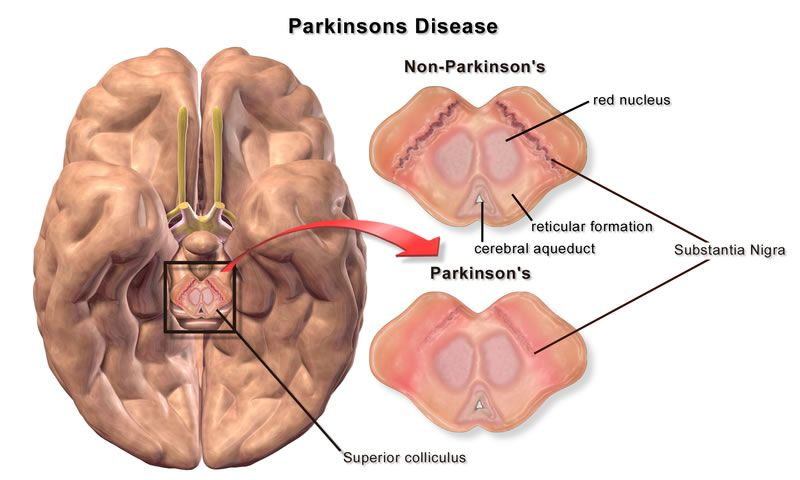

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
data = pd.read_csv(url)

data.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
data.shape

(195, 24)

Using "*.shape* " we can learn size of our  dataset (number of columns and rows)

In [ ]:
data.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


Alternatively, we can use "*.isna().sum()* ", there is no difference between them.

Eventually, **we don't have any NULL values**.

In [ ]:
data = data.drop('name', axis = 1)

In [ ]:
x = data.drop('status', axis = 1)
y = data['status']

In [ ]:
# Splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

* *Scaling*

Scaling in ML is all about getting your data to play nice together so your model doesn't trip over numbers that are on totally different scales like height in CMs say 180 and weight in KGs say 80 without scaling big numbers can bully smaller ones in algorithms like KNN, SVM or neural networks because they rely on distances or gradients scaling makes sure every feature gets an equal shot so your model learns better and faster its super important for stuff like gradient descent where big differences in scale can slow things down or mess up results plus it keeps things fair so no feature dominates just cause its numbers are bigger you dont always need scaling though like with decision trees or random forests since they don't care about scale but for most other models its a must.

Now, let's talk two big scaling methods **MinMaxScaler and Z-score** standardization a.k.a StandardScaler;

** *MinMaxScaler* ** takes your data and squashes it into a set range usually 0 to 1 it works by taking each value subtracting the smallest value in the feature and dividing by the range which is max minus min the formula is x scaled equals $X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}$* so if the heights are 170, 180, 190 the "min is 170",  "max is 190",  "range is 20". Thus,

* 180 => 180 minus 170 divided by 20 which is *0.5*
* 170 => 170 minus 170 divided by 20 which is *0.0*
* 190 => 190 minus 170 divided by 20 which is *1.0*

Eventually, this puts everything between 0 and 1 keeping the relative distances between values its great for models that like bounded data like NNs but watch out for outliers cause a crazy high or low value can squish everything else.

On the other hand, * **Z-score standardization or StandardScaler** * is different it makes your data have a mean of 0 and a standard deviation of 1 basically centering it around zero with a consistent spread the formula is, ($X_{\text{scaled}} = \frac{X - \mu}{\sigma}$). This method assumes your data is kinda normal bell curve ish and works awesome for algorithms like linear regression or SVM but outliers can mess with the mean and standard deviation so if your data’s wild you might need something else like RobustScaler.

* Mean: $\mu = \frac{180 + 170 + 190}{3} = 180$
* Std: $\sigma = \sqrt{\frac{(180-180)^2 + (170-180)^2 + (190-180)^2}{3}} = \sqrt{\frac{0 + 100 + 100}{3}} \approx 8$

Then;
* Z(180) => 180 minus 180 divided by 8 which is *0.0*
* Z(170) => 170 minus 180 divided by 8 which is *-1.2*
* Z(190) => 190 minus 180 divided by 8 which is *1.2*

Key points always scale after splitting your data into training and test sets to avoid data leakage where test info sneaks into training only fit your scaler on training data then use it to transform both training and test data MinMax is good for bounded ranges Z-score is better for normally distributed data if you got outliers RobustScaler might be your friend since it uses medians instead of means you can also reverse scaling to get back to original values which is handy for interpreting results.


In [ ]:
# Models

def evaluate_model(model, model_name):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)

    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy_score(y_test, pred):.2f}")
    print(f"Precision: {precision_score(y_test, pred):.4f}")
    print(f"Recall: {recall_score(y_test, pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, pred):.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Reds')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

A confusion matrix is a table that shows how well your model did at predicting stuff, like frauds (Class=1) versus non-frauds (Class=0). It compares what your model predicted to what’s actually true, breaking it down into four boxes; true positives, true negatives, false positives, and false negatives. It’s super useful for fraud detection task because it shows how good XGBoost model is at catching frauds without flagging too many non-frauds.

* *True Positives (TP):* Model says fraud, and it’s actually fraud.
* *True Negatives (TN):* Model says non-fraud, and it’s actually non-fraud.
* *False Positives (FP):* Model says fraud, but it’s non-fraud.
* *False Negatives (FN):* Model says non-fraud, but it’s actually fraud.

From this, we can calculate;

* *Recall* = TP / (TP + FN)
* *Precision* = TP / (TP + FP)
* *F1 Score:* Balances precision and recall.

In [ ]:
# Hyperparameter tuning

def tune_model(model, params, model_name):
    grid_search = GridSearchCV(model, params, cv = 5, scoring = 'accuracy', n_jobs = -1)
    grid_search.fit(x_train, y_train)

    print(f"\n{model_name} Best Parameters: {grid_search.best_params_}")
    print(f"{model_name} Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

    # Evaluate the best model on test set
    best_model = grid_search.best_estimator_
    evaluate_model(best_model, f"{model_name} (Tuned)")

    return best_model


Logistic Regression Best Parameters: {'C': 1, 'solver': 'lbfgs'}
Logistic Regression Best Cross-Validation Accuracy: 0.8530

Logistic Regression (Tuned) Results:
Accuracy: 0.90
Precision: 0.8889
Recall: 1.0000
F1 Score: 0.9412


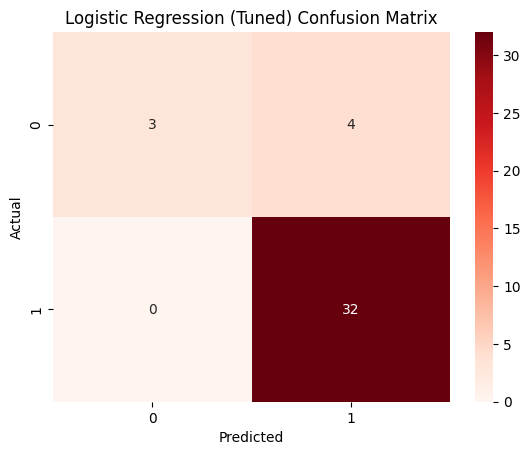

In [ ]:
# Model 1: Logistic Regression

lr_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
lr_model = LogisticRegression(random_state = 5)
best_lr = tune_model(lr_model, lr_param_grid, "Logistic Regression")


Random Forest Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Best Cross-Validation Accuracy: 0.9165

Random Forest (Tuned) Results:
Accuracy: 0.92
Precision: 0.9394
Recall: 0.9688
F1 Score: 0.9538


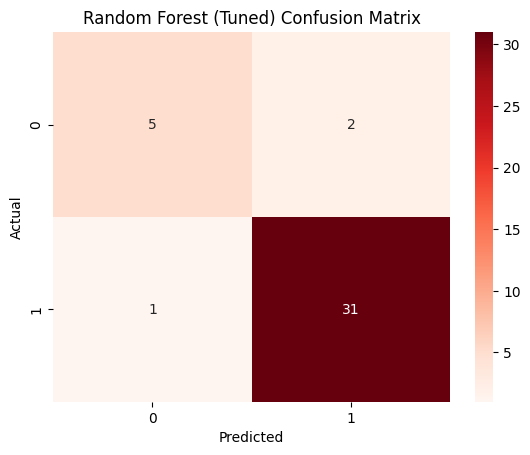

In [ ]:
# Model 2: Random Forest

rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
rf_model = RandomForestClassifier(random_state = 4)
best_rf = tune_model(rf_model, rf_param_grid, "Random Forest")


SVM Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Best Cross-Validation Accuracy: 0.9103

SVM (Tuned) Results:
Accuracy: 0.92
Precision: 0.9143
Recall: 1.0000
F1 Score: 0.9552


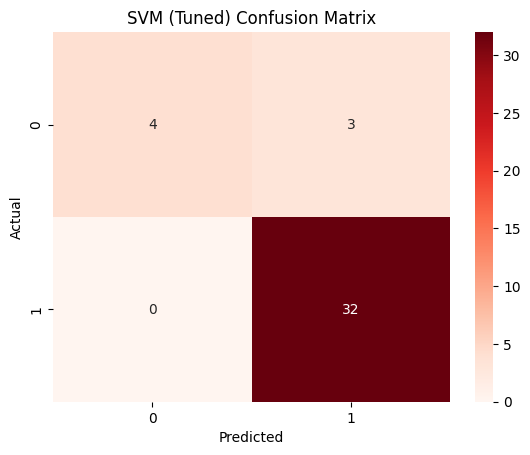

In [ ]:
# Model 3: Support Vector Machine

svm_param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
svm_model = SVC(random_state = 3)
best_svm = tune_model(svm_model, svm_param_grid, "SVM")

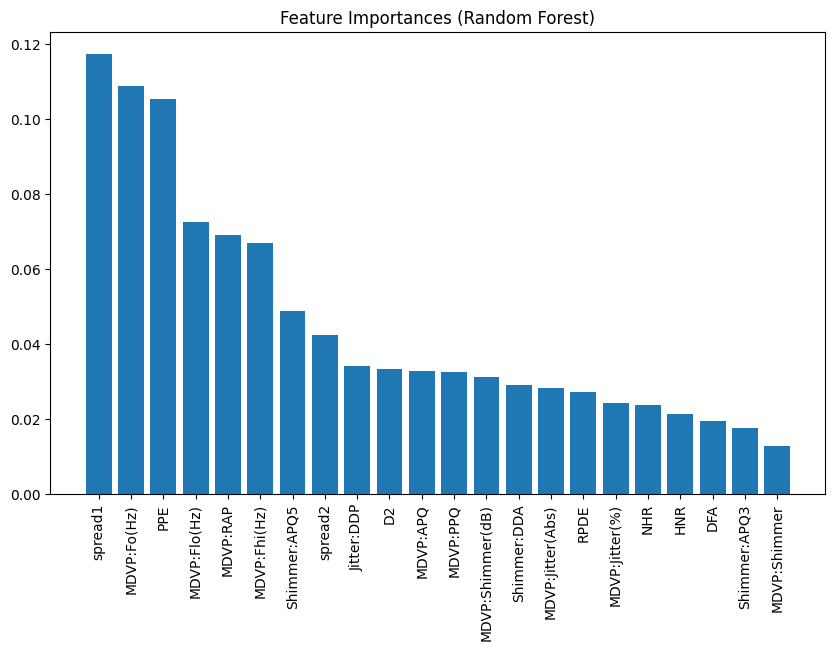

In [ ]:
# Feature Importance

importances = best_rf.feature_importances_
indices = np.argsort(importances)[ : : -1]
features = x.columns

plt.figure(figsize = (10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(x.shape[1]), importances[indices], align = "center")
plt.xticks(range(x.shape[1]), features[indices], rotation = 90)
plt.show()

In [ ]:
#Finally

In conclusion, based on the evaluation of the tuned models for Parkinson's Disease detection, all three classifiers demonstrate strong performance with test accuracies ranging from 0.90 to 0.92. The Random Forest and SVM models both achieve the highest accuracy of 0.92, while Logistic Regression follows closely with an accuracy of 0.90.

- Random Forest yields a balanced performance with a precision of 0.9394, recall of 0.9688, and an F1-score of 0.9538, making it highly effective at correctly identifying both positive and negative cases. Its ability to handle non-linear relationships and feature interactions likely contributes to its robust performance.
- SVM achieves a perfect recall of 1, meaning it identifies all positive cases, with a precision of 0.9143 and an F1-score of 0.9552. This makes it particularly suitable for scenarios where missing a positive case is critical.
- Logistic Regression also achieves a perfect recall of 1 but has a slightly lower precision (0.8889) and F1-score (0.9412), indicating it may produce more false positives compared to the other models.

As a result, given the similar accuracy and F1-scores, Random Forest is recommended for deployment due to its balanced precision and recall, robustness to feature interactions, and ability to provide feature importance insights. However, if prioritizing perfect recall is critical (e.g., in a medical setting where detecting all PD cases is paramount), SVM could be preferred. The choice depends on the specific application requirements, balancing false positives and false negatives.

***I WOULD LIKE TO EXPRESS MY SINCERE GRATITUDE FOR YOUR TIME AND CONSIDERATION***

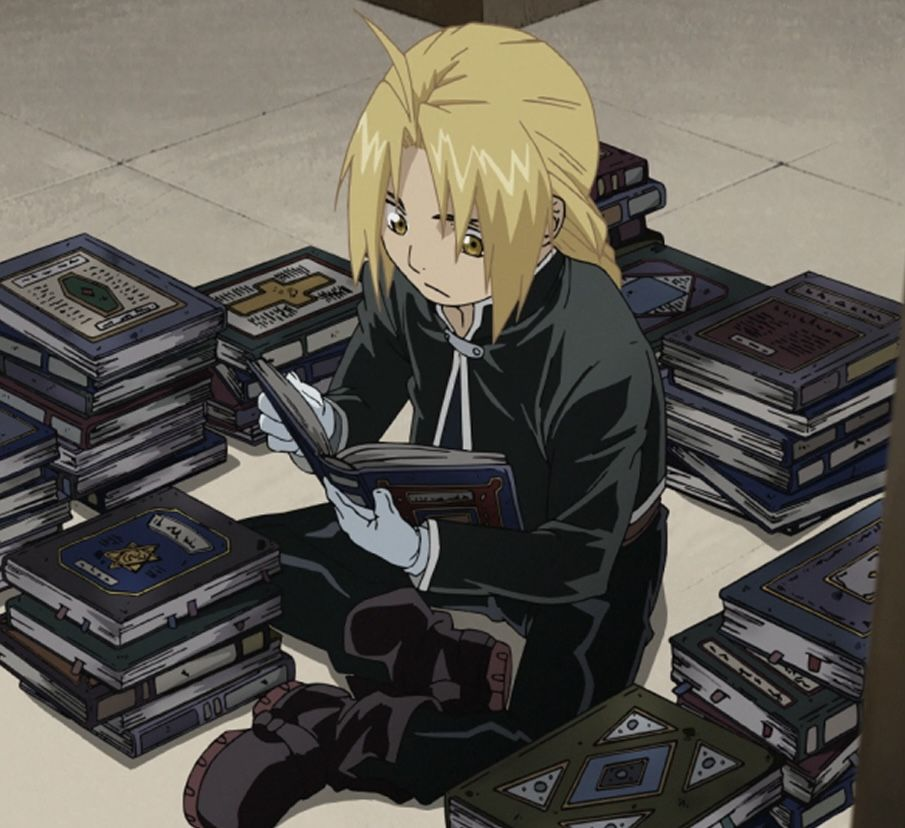